Arquivos disponíveis na pasta: ['.ipynb_checkpoints', 'Bimestral.ipynb', 'Teste em branco.csv (2).zip', 'Teste em branco.csv.zip']


,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
sexo,,,
Feminino,24,63.160000,24
Masculino,13,34.210000,37
Prefiro não dizer,1,2.630000,38


,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
faixa_etaria,,,
18 a 21 anos,12,31.580000,12
22 a 25 anos,13,34.210000,25
26 a 30 anos,2,5.260000,27
Mais de 30 anos,10,26.320000,37
Menos de 18 anos,1,2.630000,38


,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
uso_eletronico,,,
Não,3,7.890000,3
Sim,35,92.110000,38


,Variável,Média,Moda,Mediana
0,Produtividade,3.500000,4.000000,4.000000
1,Horas de Sono,6.735294,6.000000,6.000000
2,Horário Dormir (média horária),16.407895,23.500000,22.500000
3,Sensação ao Acordar,3.394737,3.000000,3.000000
4,Vezes que Acorda à Noite,0.815789,1.000000,1.000000


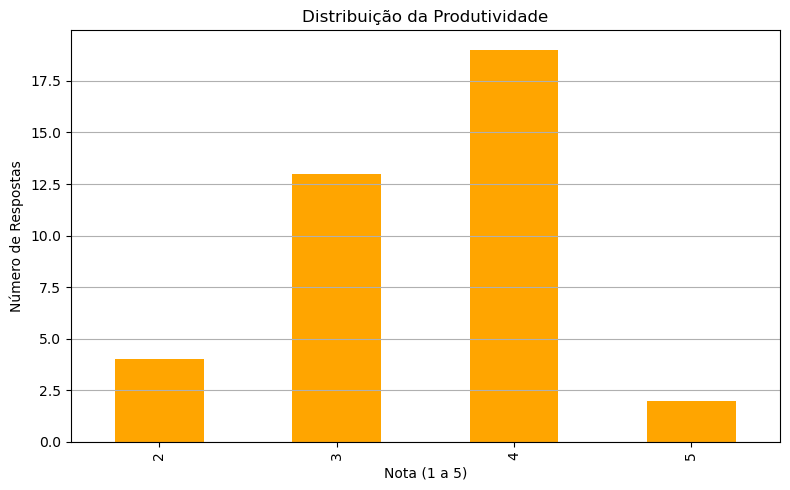

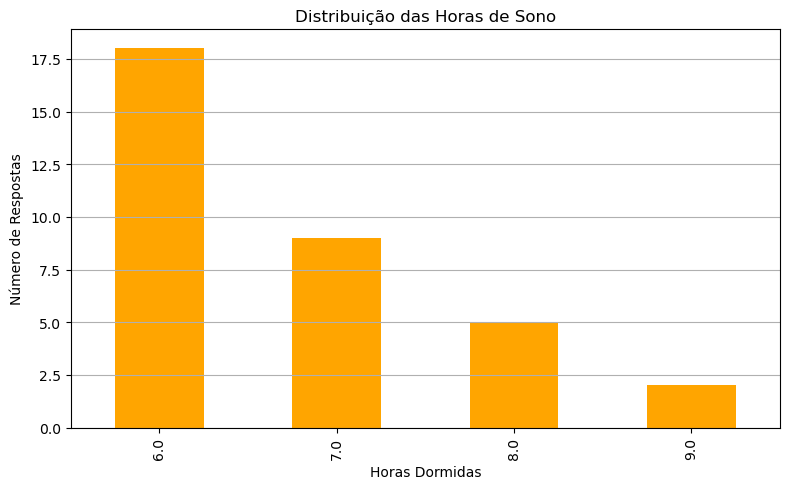

In [15]:
#   bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os

#  Verificar os arquivos disponíveis
print("Arquivos disponíveis na pasta:", os.listdir())

#  Carregar o CSV formulario
df = pd.read_csv("Teste em branco.csv (2).zip")

#  Renomear colunas para facilitar
df.columns = [
    "timestamp", "sexo", "faixa_etaria", "horas_sono",
    "horario_dormir", "descansado", "uso_eletronico",
    "produtividade", "acorda_noite", "queda_rendimento"
]

#  Função para gerar tabela de frequência
def frequencia_completa(coluna):
    absoluta = df[coluna].value_counts().sort_index()
    relativa = round(absoluta / absoluta.sum() * 100, 2)
    acumulada = absoluta.cumsum()
    tabela = pd.DataFrame({
        "Frequência Absoluta": absoluta,
        "Frequência Relativa (%)": relativa,
        "Frequência Acumulada": acumulada
    })
    return tabela.style.set_caption(f" Frequência - {coluna.capitalize()}")\
                        .set_table_attributes('style="border:1px solid black;"')\
                        .set_properties(**{'border': '1px solid black', 'text-align': 'center'})\
                        .set_table_styles([{
                            'selector': 'th',
                            'props': [('background-color', '#f0f0f0'), ('border', '1px solid black')]
                        }])

#  Exibir as tabelas de frequência
display(frequencia_completa("sexo"))
display(frequencia_completa("faixa_etaria"))
display(frequencia_completa("uso_eletronico"))

#  criei mapas pra variáveis ordinais para números
mapa_horas = {
    "Menos de 6 horas": 5,
    "6 horas": 6,
    "7 horas": 7,
    "8 horas": 8,
    "Mais de 8 horas": 9
}

mapa_horario_dormir = {
    "Antes das 22h": 21,
    "Entre 22h e 23h": 22.5,
    "Entre 23h e 00h": 23.5,
    "Depois da 00h": 1  # madrugada
}

mapa_descansado = {
    "Nunca": 1,
    "Raramente": 2,
    "Às vezes": 3,
    "Frequentemente": 4,
    "Sempre": 5
}

mapa_acorda = {
    "Nunca": 0,
    "1 vez por noite": 1,
    "2 ou mais vezes por noite": 2
}

#   mapas no DataFrame
df["produtividade"] = df["produtividade"].astype(int)
df["horas_convertidas"] = df["horas_sono"].map(mapa_horas)
df["horario_convertido"] = df["horario_dormir"].map(mapa_horario_dormir)
df["descansado_convertido"] = df["descansado"].map(mapa_descansado)
df["acorda_convertido"] = df["acorda_noite"].map(mapa_acorda)

#  Estatísticas descritivas de 5 variáveis
estatisticas = pd.DataFrame({
    "Variável": [
        "Produtividade",
        "Horas de Sono",
        "Horário Dormir (média horária)",
        "Sensação ao Acordar",
        "Vezes que Acorda à Noite"
    ],
    "Média": [
        df["produtividade"].mean(),
        df["horas_convertidas"].mean(),
        df["horario_convertido"].mean(),
        df["descansado_convertido"].mean(),
        df["acorda_convertido"].mean()
    ],
    "Moda": [
        df["produtividade"].mode().iloc[0],
        df["horas_convertidas"].mode().iloc[0],
        df["horario_convertido"].mode().iloc[0],
        df["descansado_convertido"].mode().iloc[0],
        df["acorda_convertido"].mode().iloc[0]
    ],
    "Mediana": [
        df["produtividade"].median(),
        df["horas_convertidas"].median(),
        df["horario_convertido"].median(),
        df["descansado_convertido"].median(),
        df["acorda_convertido"].median()
    ]
})

#  Exibir estatísticas descritivas
display(estatisticas.style.set_caption(" Estatísticas Descritivas - 5 Variáveis")\
    .set_table_attributes('style="border:1px solid black;"')\
    .set_properties(**{'border': '1px solid black', 'text-align': 'center'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f0f0f0'), ('border', '1px solid black')]
    }]))

#  Gráfico de produtividade
plt.figure(figsize=(8, 5))
df["produtividade"].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Distribuição da Produtividade")
plt.xlabel("Nota (1 a 5)")
plt.ylabel("Número de Respostas")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#  Gráfico de horas de sono
plt.figure(figsize=(8, 5))
df["horas_convertidas"].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Distribuição das Horas de Sono")
plt.xlabel("Horas Dormidas")
plt.ylabel("Número de Respostas")
plt.grid(axis='y')
plt.tight_layout()
plt.show()    